In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers

from keras.layers.normalization import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import mnist
from keras.datasets import cifar10

from keras.utils.np_utils import to_categorical

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
print(f"{x_train.shape}")
print(f"{y_train.shape}")
print(f"{x_test.shape}")
print(f"{y_test.shape}")

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [12]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [13]:
x_test = x_test.reshape(-1,28,28,1) #canal=1 for grey scale
x_train = x_train.reshape(-1,28,28,1) #canal=1 for grey scale

In [14]:
y_train = to_categorical(y_train) # Encode labels to one hot vectors
y_test = to_categorical(y_test)   # Encode labels to one hot vectors

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

### Data Visualitation

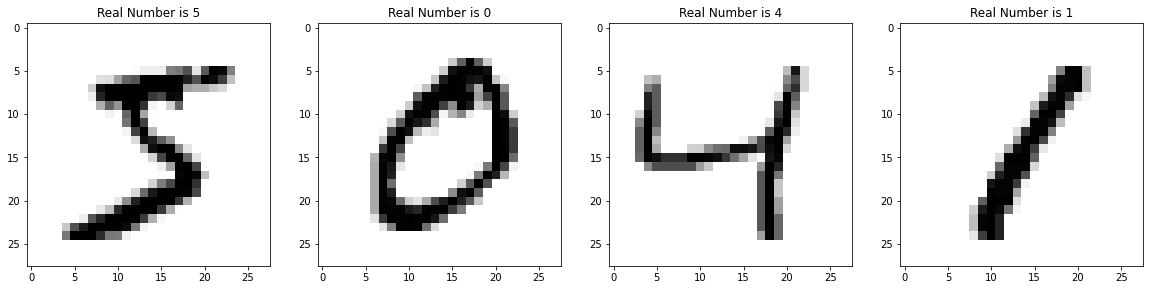

In [16]:
x_train_v = x_train.reshape(x_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_train_v[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

### Normalitation

In [17]:
mean = np.mean(x_train)
std = np.std(x_train)

def standardize(x):
    return (x-mean)/std

In [18]:
epochs = 50
batch_size = 64

# CNN
### Define model

In [19]:
model=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))    
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

##### Para evitar el overfitting, y aumentar la precision de los datos podriamos añadir más datos alterando los que ya tenemos con rotaciones de X grados,  zoom, desplazamiento horizontal o vertical, etc..

### Model training

In [20]:
model.fit(x_train, y_train, batch_size=batch_size, validation_split=0.2, epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 376s 8ms/step - loss: 0.0928 - accuracy: 0.9716 - val_loss: 0.1822 - val_accuracy: 0.9464
Epoch 2/10
48000/48000 [==============================] - 358s 7ms/step - loss: 0.0429 - accuracy: 0.9872 - val_loss: 0.0459 - val_accuracy: 0.9866
Epoch 3/10
48000/48000 [==============================] - 334s 7ms/step - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0492 - val_accuracy: 0.9853
Epoch 4/10
48000/48000 [==============================] - 329s 7ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0452 - val_accuracy: 0.9884
Epoch 5/10
48000/48000 [==============================] - 307s 6ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0487 - val_accuracy: 0.9873
Epoch 6/10
48000/48000 [==============================] - 305s 6ms/step - loss: 0.0190 - accuracy: 0.9947 - val_loss: 0.0607 - val_accuracy: 0.9854
Epoch 7/10
48000/48000 [==============================] - 369s

### Prediction

In [33]:
x_test.shape

(10000, 28, 28, 1)

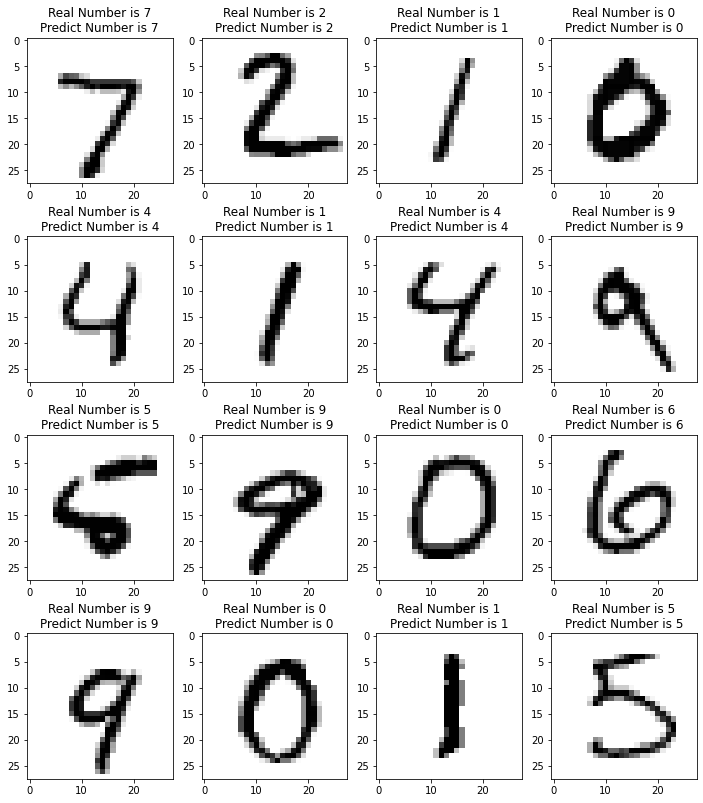

In [25]:
y_pred = model.predict(x_test)
x_test_v = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test_v[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

In [27]:
pred = model.predict_classes(x_test, verbose=1)

10000/10000 [==============================] - 13s 1ms/step


In [34]:
from sklearn.metrics import accuracy_score

In [65]:
#vamos a convertir y_pred que esta en probabilidades a 0s y 1 para calcular el accuracy de nuestro modelo

In [68]:
idx = np.argmax(y_pred, axis=-1) 
idx

array([7, 2, 1, ..., 4, 5, 6])

In [67]:
preds = np.zeros(y_pred.shape)

In [63]:
for j,i in enumerate(idx):
    preds[j,i] = 1
    
preds

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
accuracy_score(y_test, preds)

0.9913

El accuracy de nuestro modelo es del 99,13%